<a href="https://colab.research.google.com/github/dcdlima/DL-with-python/blob/main/DL_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Primeiramente deve-se criar os tensores para realizar os cálculos necessários
All one or All zeros tensors

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


### Pode-se criar tensores de valores aleatórios

In [3]:
x = tf.random.normal(shape=(3,1),mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[ 1.0440227 ]
 [-0.06757975]
 [ 1.4013829 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1),minval=0.,maxval=1.)
print(x)

tf.Tensor(
[[0.53126884]
 [0.92352176]
 [0.2289412 ]], shape=(3, 1), dtype=float32)


### Diferentemente dos arrays no Numpy não se pode atribuir valores aos tensores no TensorFlow

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [6]:
### não é possível atribuir valores no tensor

x = tf.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [7]:
### Criando uma variável TensorFlow

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.375397  ],
       [-1.5788417 ],
       [ 0.28018662]], dtype=float32)>


In [8]:
### atribuindo valores a uma variável TensorFlow

v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
### atribuindo valor a um subconjunto da variável TensorFlow
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
### utilizando assign_add()
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [11]:
### Operações com Tensores

a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [12]:
### GradientTape API

input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [13]:
### GradientTape com entradas de tensor constante

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [14]:
### GradientTapes aninhados para calcular gradientes de segunda ordem

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>

## Implementando um classificador linear com Tensor Flow


In [15]:
### Criação de dados sintéticos
### gerando duas classes de pontos aleatórios em um plano 2D

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [16]:
### Acomodando as duas classes em um array (2000, 2)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
### gerando os targets correspondentes (0 e 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

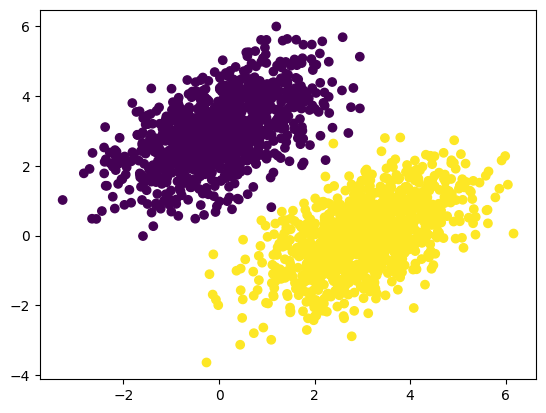

In [18]:
### Plotando os dados com matplotlib

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [19]:
### Criando as variáveis do classificador linear

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [20]:
### Função foward pass

def model(inputs):
    return tf.matmul(inputs, W) + b




In [21]:
### MSE função custo

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [22]:
### função etapa de treinamento

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

Loss at step 0: 1.0945
Loss at step 1: 0.2067
Loss at step 2: 0.1166
Loss at step 3: 0.0976
Loss at step 4: 0.0894
Loss at step 5: 0.0831
Loss at step 6: 0.0777
Loss at step 7: 0.0727
Loss at step 8: 0.0682
Loss at step 9: 0.0641
Loss at step 10: 0.0604
Loss at step 11: 0.0570
Loss at step 12: 0.0540
Loss at step 13: 0.0512
Loss at step 14: 0.0486
Loss at step 15: 0.0463
Loss at step 16: 0.0443
Loss at step 17: 0.0424
Loss at step 18: 0.0406
Loss at step 19: 0.0391
Loss at step 20: 0.0376
Loss at step 21: 0.0363
Loss at step 22: 0.0352
Loss at step 23: 0.0341
Loss at step 24: 0.0331
Loss at step 25: 0.0322
Loss at step 26: 0.0314
Loss at step 27: 0.0307
Loss at step 28: 0.0300
Loss at step 29: 0.0294
Loss at step 30: 0.0289
Loss at step 31: 0.0284
Loss at step 32: 0.0279
Loss at step 33: 0.0275
Loss at step 34: 0.0272
Loss at step 35: 0.0268
Loss at step 36: 0.0265
Loss at step 37: 0.0262
Loss at step 38: 0.0260
Loss at step 39: 0.0257


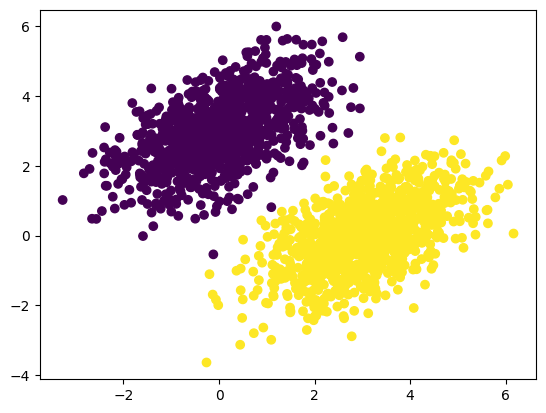

In [23]:
### loop to treinamento da batelada

for step in range(40):
  loss = training_step(inputs, targets)
  print(f'Loss at step {step}: {loss:.4f}')

predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()

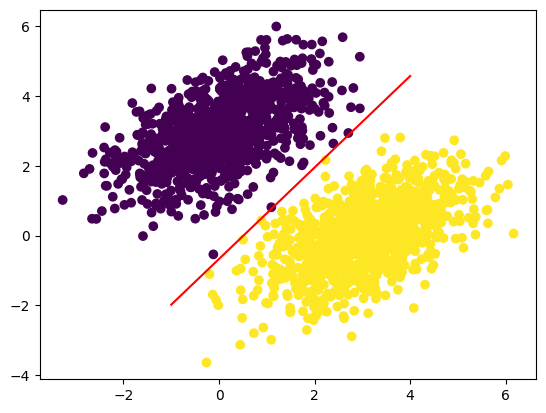

In [24]:
### desenhar uma linha para melhor visualização da classificação

x = np.linspace (-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()

### Loading the IMDB Dataset

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [27]:
train_labels[0]

1

In [28]:
### restringimos os dados a 10000 por isso nenhum valor excederá a ele.

max([max(sequence) for sequence in train_data])

9999

In [29]:
###decodificando os reviews de volta para texto

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join ([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
### Multihot encoding para sequencia de intengers - aqui está ocorrendo a vetorização dos dados

import numpy as np
def vectorize_sequences (sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [31]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
### também é necessário vetorizar os rótulos

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


Após as etapas realizadas anteriormente os dados estão prontos para serem aplicados em uma rede neural.
Abaixo um exemplo de um modelo.


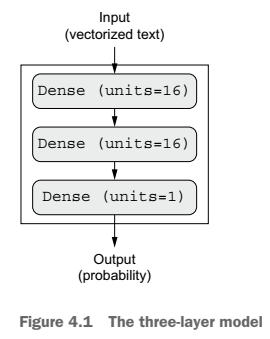

Extraído do livro Deep Learning With Python

In [35]:
### Definição do modelo

from tensorflow import keras
from tensorflow.keras import layers

### 2 camadas intermediárias de 16 unidades e uma camada de saída com 1 unidade

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])